## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import warnings
warnings.filterwarnings('ignore')

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df

from message_ix.tools.add_dac import add_dac
from message_ix.tools.add_dac import get_report

%matplotlib inline


mp = ixmp.Platform()


<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


## Clone baseline and create emission bound scenario

In [2]:
# this is to import scenario from data base and clone to local
base = message_ix.Scenario(mp, model='GENIE_sandbox_daccstest', scenario="daccs_baseline")

scen = base.clone(
    "GENIE_sandbox_daccstest",
    "daccs_emission_bound1000",
    "adding emission bound to DAC scenario",
    keep_solution=False, 
)
scen.check_out()

year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")


#### Add emission bound

In [3]:
# add emission bound
scen.add_par('bound_emission', ['World', 'TCE_CO2', 'all', 'cumulative'], value=2421.17, unit="tC")

## Run the model

In [4]:
scen.commit(comment="DACs scenario with emission bound")
scen.set_as_default()
scen.solve(solve_options={'barcrossalg': '2','scaind':'1'})
scen.var("OBJ")["lvl"]

3812817.25

Now, let's see where the removal comes from!

**Emission bound with DACCS scenario**

-- DACCS:

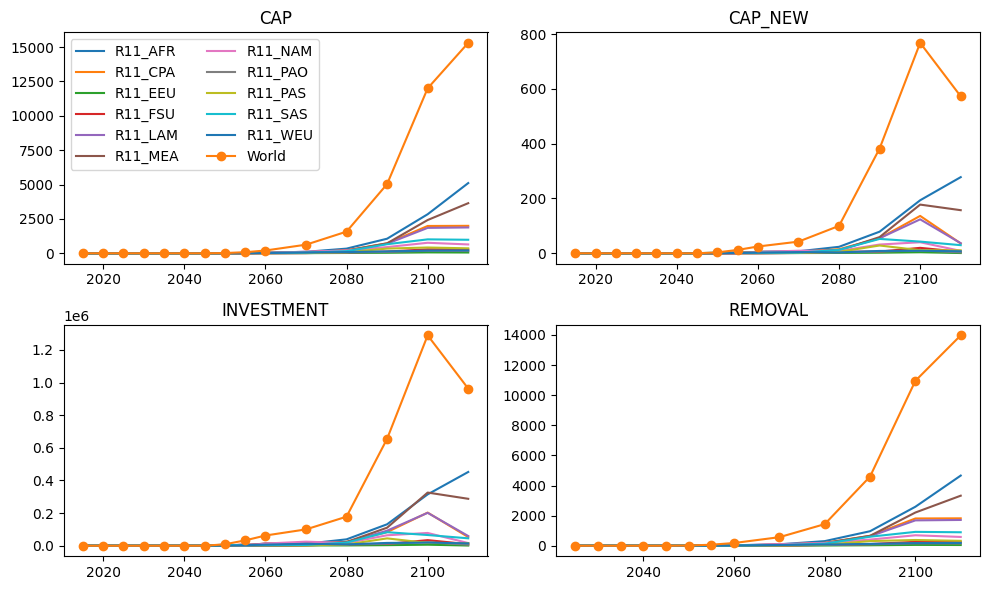

In [5]:
# Create list of technologies for get_report()
daccs_tec = ['lt_daccs','ht_daccs']
beccs_tec = ['bio_istig_ccs','eth_bio_ccs','h2_bio_ccs','liq_bio_ccs']

# This is how you get the report
daccs_report = get_report(scen,daccs_tec)

-- BECCS

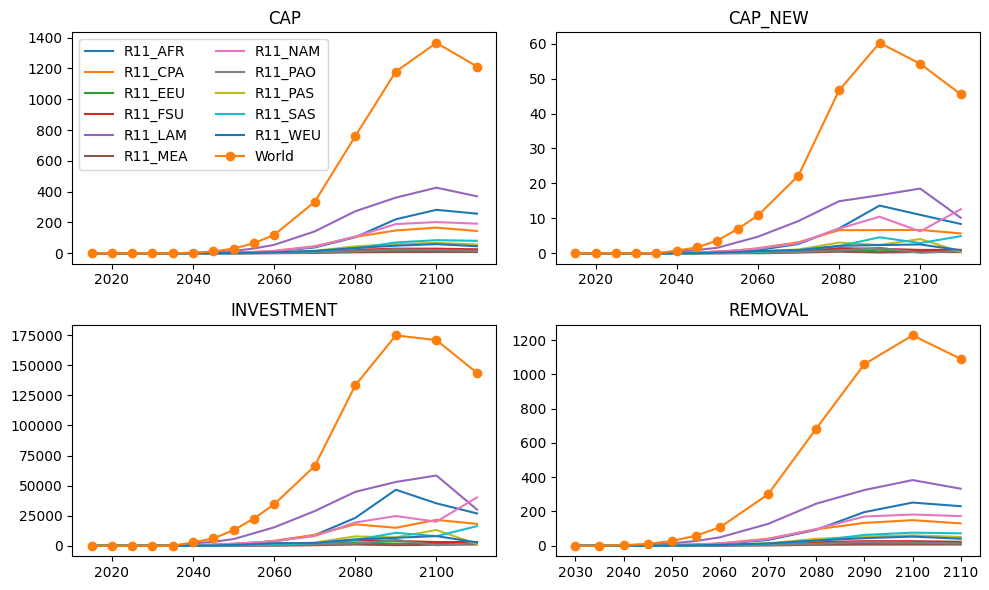

In [6]:
beccs_report = get_report(scen,beccs_tec)

Now, let's compare with removal from BECCS in **emission bound without DACCS scenario** (benchmark)!

-- BECCS:

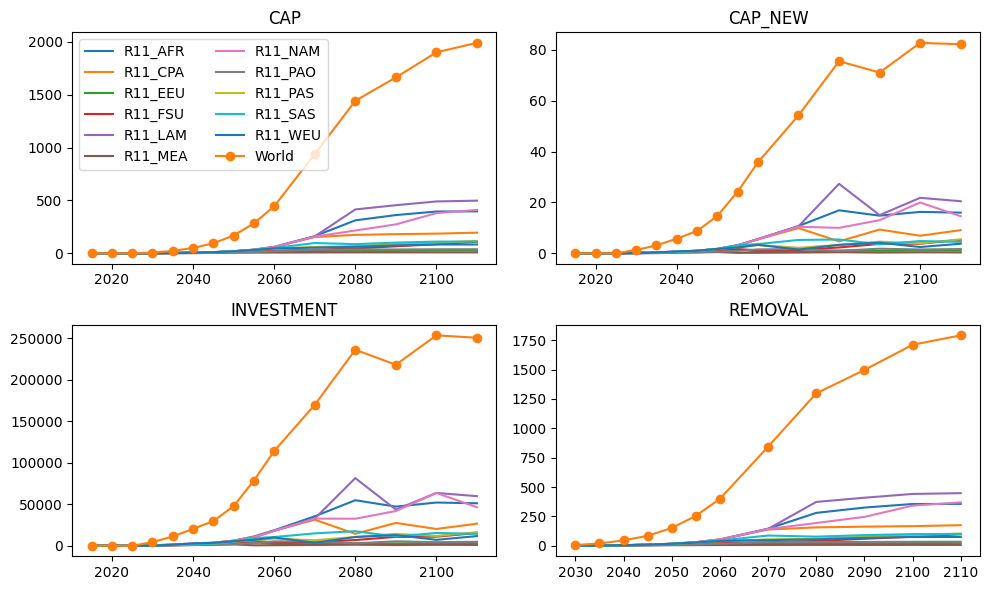

In [7]:
benchmark = message_ix.Scenario(mp, model='GENIE_sandbox_daccstest', scenario="nodaccs_emission_bound1000")
beccs_tec = ['bio_istig_ccs','eth_bio_ccs','h2_bio_ccs','liq_bio_ccs']

# This is how you get the report
beccs_report_benchmark = get_report(benchmark,beccs_tec)

## Close connection

In [8]:
mp.close_db()